# Evaluation metrics

In this notebook, you are going to work with Evaluation metrics. It contains three parts, 1) Regression, 2) Binary classification, and 3) Multiclass classification. 

In [1]:
# Import needed libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score 

## 1) Regression

Regression is used to predict a (real) number. In the example in the cell below we have 12 data points in the variable *data*. The variables *prediction1* and *prediction2* are the predictions generated by two regression models.

In [2]:
data = [0.6, 1.4, 2, 2.1, 2.5, 4, 5, 5.5, 6, 7.8, 8, 14]
prediction1 = [-0.41, 0.55, 1.52, 2.49, 3.46, 4.42, 5.39, 6.36, 7.33, 8.3, 9.27, 10.23]
prediction2 = [-1.41, -0.25, 0.92, 2.09, 3.26, 4.42, 5.59, 6.76, 7.93, 9.1, 10.27, 11.43]

In the plot you can see both predictions and the original data.

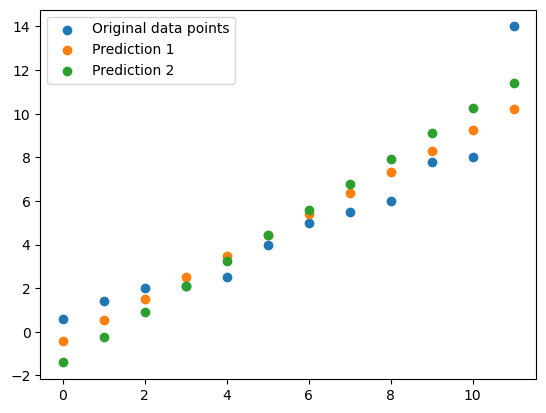

In [3]:
plt.scatter(range(len(data)), data, label='Original data points')
plt.scatter(range(len(data)), prediction1, label='Prediction 1')
plt.scatter(range(len(data)), prediction2 , label='Prediction 2')
plt.legend(loc='upper left')

Based on just the plot it might be difficult to decide whether the *prediction1* or the *prediction2* is better. Luckily we can calculate objective measures to determine which is better. 

### Exercise 1 _ Mean Absolute Error (MAE) and Mean Squared Error (MSE)

#### Part 1 _ Getting warmed up

Write code to compute and print the MAE between two lists of values, *volume* and *predicted_volume*. You can assume the lengths of the lists are equal and have more than 1 element each. 

*Hint* start by using a for-loop to compute the absolute value between the $i^{th}$ value of each list.


In [4]:
volume = [8.3, 9.27, 10.23, -0.41, 0.55, 1.52, 2.49, 3.46, 4.42, 5.39, 6.36, 7.33]
predicted_volume = [0.6, 1.4, 2, 2.1, 2.5, 4, 5, 5.5, 6, 7.8, 8, 14]

sum_abs = 0
for i in range(len(volume)):
    sum_abs += abs(volume[i] - predicted_volume[i])
mae_xy = sum_abs / len(volume)

print(f'\tMAE: {mae_xy:04.3f}')

	MAE: 3.966


#### Part 2 _ Generalize your MAE solution to a function

Based on your code above, generalize your solution to write a function to compute the Mean Absolute Error (MAE) for any two lists of values. As before, you can assume the lengths of the lists are equal and have more than 1 element each.

In [5]:
def mean_absolute_e(y_true, y_pred):
    """A function which takes two lists and returns the MAE"""
    #..............................................................
    sum_abs = 0
    for i in range(len(y_true)):
        sum_abs += abs(y_true[i] - y_pred[i])
    return sum_abs/len(y_true)  

In [6]:
print('Prediction 1:')
print(f'\tMAE: {mean_absolute_e(data, prediction1):04.3f}')
print('Prediction 2:')
print(f'\tMAE: {mean_absolute_e(data, prediction2):04.3f}')

Prediction 1:
	MAE: 1.019
Prediction 2:
	MAE: 1.321


#### Part 3 _ Adapt your MAE solution to write a MSE function

Based on your solution to Part 3 above, adapt your MAE function to write a function to compute the Mean Squared Error (MSE) for any two lists of values. As before, you can assume the lengths of the lists are equal and have more than 1 element each. If you are stuck, repeat Part 1 (without a function) for MSE before building your function.

In [7]:
def mean_squared_e(y_true, y_pred):
    """A function which takes two lists and returns the MSE"""
    #..............................................................
    sum_sq = 0
    for i in range(len(y_true)):
        sum_sq += (y_true[i] - y_pred[i])**2
    return sum_sq/len(y_true)  


In [8]:
print('Prediction 1:')
print(f'\tMSE: {mean_squared_e(data, prediction1):04.3f}')
print('Prediction 2:')
print(f'\tMSE: {mean_squared_e(data, prediction2):04.3f}')

Prediction 1:
	MSE: 1.830
Prediction 2:
	MSE: 2.316


#### Additional coding challenge 1

When you have completed the rest of the exercise, using only python (no numpy or functions from other packages) and without using a loop, write functions to compute the Mean Absolute Error (MAE) and Mean Squared Error (MSE) for any two lists of values.

In [9]:
# Using List comprehension
def mean_absolute_e(y_true, y_pred):
    """A function which takes two lists and returns the MAE"""
    #..............................................................
    sum_abs = sum([abs(y_true[i] - y_pred[i]) for i in range(len(y_true))])
    return sum_abs/len(y_true)

In [10]:
print('Prediction 1:')
print(f'\tMAE: {mean_absolute_e(data, prediction1):04.3f}')
print('Prediction 2:')
print(f'\tMAE: {mean_absolute_e(data, prediction2):04.3f}')

Prediction 1:
	MAE: 1.019
Prediction 2:
	MAE: 1.321


In [11]:
def mean_squared_e(y_true, y_pred):
    """A function which takes two lists and returns the MSE"""
    #..............................................................
    sum_sq = sum([(y_true[i] - y_pred[i])**2 for i in range(len(y_true))])
    return sum_sq/len(y_true)

In [12]:
print('Prediction 1:')
print(f'\tMSE: {mean_squared_e(data, prediction1):04.3f}')
print('Prediction 2:')
print(f'\tMSE: {mean_squared_e(data, prediction2):04.3f}')

Prediction 1:
	MSE: 1.830
Prediction 2:
	MSE: 2.316


#### Additional coding challenge 2

When you have completed the rest of the exercise, use function(s) from the numpy package to make your solution to the additional coding challenge 1 even faster:  write functions to compute the Mean Absolute Error (MAE) and Mean Squared Error (MSE) for any two lists of values.

*Hint* It's actually easier to implement this with the powerful functions in numpy than only python functions.

In [13]:
# Using Numpy functions
def mean_absolute_e(y_true, y_pred):
    """A function which takes two lists and returns the MSE"""
    #..............................................................
    return np.mean(np.abs(np.array(y_true) - np.array(y_pred)))

In [14]:
print('Prediction 1:')
print(f'\tMAE: {mean_absolute_e(data, prediction1):04.3f}')
print('Prediction 2:')
print(f'\tMAE: {mean_absolute_e(data, prediction2):04.3f}')

Prediction 1:
	MAE: 1.019
Prediction 2:
	MAE: 1.321


In [15]:
def mean_squared_e(y_true, y_pred):
    """A function which takes two lists and returns the MSE"""
    #..............................................................
    return np.mean(np.square(np.array(y_true) - np.array(y_pred)))

In [16]:
print('Prediction 1:')
print(f'\tMSE: {mean_squared_e(data, prediction1):04.3f}')
print('Prediction 2:')
print(f'\tMSE: {mean_squared_e(data, prediction2):04.3f}')

Prediction 1:
	MSE: 1.830
Prediction 2:
	MSE: 2.316


#### Part 4 _ Using scikit learn

The library scikit-learn contains functions to calculate the metrics above. Import them from `sklearn.metrics` and test them, they should produce the same values as your solutions to Parts 2 and 3.

**Hint:** Find the documents here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html and
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [17]:
print('Prediction 1:')
scikit_learn_mse = mean_squared_e(data, prediction1)
print(f'\tMSE: {scikit_learn_mse:04.3f}')
print('Prediction 2:')
scikit_learn_mse = mean_squared_e(data, prediction2)
print(f'\tMSE: {scikit_learn_mse:04.3f}')

Prediction 1:
	MSE: 1.830
Prediction 2:
	MSE: 2.316


## 2) Binary classification

Binary classification is applicable when there are only two possible answers (e.g., yes/no, good/bad, positive/negative, etc.). In this notebook we will use *0* (not-spam/ham) and *1* (spam) as the possible outcomes.

In the cell below we have for 100 emails with information about whether they are really spam, and whether they were flagged as spam.

In [18]:
spam = [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 
           0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
           0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 
           0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]

flagged = [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
               0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0]

### Exercise 2 _ Accuracy

#### Part 1

One way to evaluate how well our spam filter performed is to calculate the accuracy which tells us how often it was correct. Write code to compute the accuracy between the *spam* and *flagged* variables.

**Note**: In python you can use `==` to test if two values are equal. This will return a boolean value (`True` or `False`). However, in python you can also add two boolean values together and in that case `True` is treated as the value 1 while `False` is treated as the value 0. Therefore:

In [19]:
index_0 = spam[0] == spam[0]
index_1 = spam[1] == spam[1]
sum_01 = index_0 + index_1

# two boolean values
print("Boolean values:", index_0, index_1)

# whose sum is an integer
print("Sum is integer:", sum_01)

Boolean values: True True
Sum is integer: 2


In [20]:
sum_eq = 0
for i in range(len(spam)):
    sum_eq += spam[i] == flagged[i]
accuracy = sum_eq / len(spam)
print(accuracy)

0.91


#### Part 2

Adapt your code above to write a function that computes the accuracy.


In [21]:
def accuracy(y_true, y_pred):
    """A function which takes two lists and returns the accuracy"""
    #..............................................................
    sum_eq = 0
    for i in range(len(spam)):
        sum_eq += spam[i] == flagged[i]
    return sum_eq / len(spam)

In [22]:
print(accuracy(spam, flagged))

0.91


#### Additional coding challenge 3

When you have completed the rest of the exercise, write the function in part 2 above without using any loops.

In [23]:
# Using List comprehension
def accuracy(y_true, y_pred):
    """A function which takes two lists and returns the accuracy"""
    #..............................................................
    return sum([y_true[i]==y_pred[i] for i in range(len(y_true)) ]) / len(y_true)

print(accuracy(spam, flagged))

0.91


#### Additional coding challenge 4

When you have completed the rest of the exercise, use function(s) from the numpy package to make your solution to the additional coding challenge 3 even faster.

In [24]:
# Alternative solution for MAE using Numpy
def accuracy(y_true, y_pred):
    """A function which takes two lists and returns the accuracy"""
    #..............................................................
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(y_true == y_pred)

print(accuracy(spam, flagged))

0.91


#### Part 3 _ Using scikit learn

The library scikit-learn contains functions to calculate accuracy. Import them from `sklearn.metrics` and test them, they should produce the same values as your solutions to Parts 2 and 3.

In [25]:
# see above: from sklearn.metrics import accuracy_score

print('Accuracy using Scikit-learn library')
print(accuracy_score(spam, flagged))

Accuracy using Scikit-learn library
0.91


### Exercise 3 _ Precision and Recall

What would be a potential downside of using accuracy? Think of spam classification in terms of True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN), as in the table below. Are all these types of errors equally important?

```

|                 | Predicted Not Spam | Predicted Spam |
|-----------------|--------------------|----------------|
| Actual Not Spam |   TN               |  FP            |
| Actual Spam     |   FN               |  TP            |
```


A table like the one above is called a confusion matrix, or error matrix, and it allows you to visualize your model's performance. In our case we are interested in how our spam filter performed. There is a function in scikit-learn that returns the confusion matrix as a 2-dimensional numpy array:

In [26]:
# see above: from sklearn.metrics import confusion_matrix

CM = confusion_matrix(spam, flagged)
print('Confusion Matrix using Scikit-learn library:')
print(CM)

Confusion Matrix using Scikit-learn library:
[[80  3]
 [ 6 11]]


Now that we have our confusion matrix we can calculate a number of other metrics, for this practical we will focus on precision and recall. 

#### Part 1

Given three variables: a true positive count *TP*, a false positive count *FP*, and a false negative count *FN*, compute *precision* and *recall*

In [27]:
CM = confusion_matrix(spam, flagged) # this assumes this function has been 
TP = CM[1, 1] # this is pulling a value from the numpy array CM
FP = CM[0, 1] # this is pulling a value from the numpy array CM
FN = CM[1, 0] # this is pulling a value from the numpy array CM

In [28]:
precision = TP/(TP+FP)
print(round(precision, 3))

0.786


In [29]:
recall = TP/(TP+FN)
print(round(recall, 3))

0.647


#### Part 2 _ Convert to functions

Use the code you wrote in Part 2 (along with the code to pull values from a numpy array) to write functions to compute *precision* and *recall* based on a confusion matrix: 

In [30]:
def precision(M):
    """A function which takes a 2x2 confusion matrix and returns the precision"""
    #............................................................................
    TP = M[1, 1]
    FP = M[0, 1]
    return TP/(TP+FP)

In [31]:
print(round(precision(CM),3))

0.786


In [32]:
def recall(M):
    """A function which takes a 2x2 confusion matrix and returns the recall"""
    #.........................................................................
    TP = M[1, 1]
    FN = M[1, 0]
    return TP/(TP+FN)    

In [33]:
print(round(recall(CM), 3))

0.647


#### Part 3 _ Using scikit learn

The library scikit-learn contains functions to calculate precision and recall. Import them from `sklearn.metrics` and test them, they should produce the same values as your solutions to Part 2.

In [34]:
# see above: from sklearn.metrics import precision_score, recall_score

print(round(precision_score(spam, flagged),3))
print(round(recall_score(spam, flagged),3))

0.786
0.647


### Exercise 4 _ F-score

Often we are interested in doing well on both the precision and recall, and as such we can calculate the (harmonic) mean of these metrics. This harmonic mean is called the F1-score.

#### Part 1 _ Compute an F1 score from example scores

In [35]:
example_precision = 0.4
example_recall = 0.6

F1 = 2 * example_precision * example_recall / (example_precision + example_recall)
print(F1)

0.48


#### Part 2 _ Convert to a function

Using your solution from Part 1, write a function to compute the F1 score

In [36]:
def f_score(precision, recall):
    """A function which takes the precision and recall of some model, and returns the f1-score"""
    #.........................................................................
    
    return 2 * precision * recall / (precision + recall)

In [37]:
print(f_score(0.4, 0.6))

0.48


#### Part 3 _ Writing the F_beta-score function

Adapting your solution from Part 2, complete the *f_beta_score* function in the next cell.

**Note**: The `beta=1` parameter to the function specifies a default parameter that the function will use if the `beta` parameter is not defined.

In [38]:
def f_beta_score(precision, recall, beta=1):
    """A function which takes the precision and recall of some model, and a value for beta,
    and returns the f_beta-score"""
    #......................................................................................
    
    return (1+beta**2) * precision * recall / (beta**2 * precision + recall)

In [39]:
print(f_beta_score(0.4, 0.6, 1))
print(round(f_beta_score(0.4, 0.6, 0.5), 3))
print(round(f_beta_score(0.4, 0.6, 2), 3))

0.48
0.429
0.545


#### Additional coding exercise

Now that you have defined the f_beta_score function, you can redefine the F1_score function using only a call to the f_beta_score function. Rewrite the f_score function in this way.

In [40]:
def f_score(precision, recall):
    """A function which takes the precision and recall of some model, and returns the f1-score"""
    #.........................................................................
    
    return f_beta_score(precision, recall, 1)  

In [41]:
print(f_score(0.4, 0.6))

0.48


#### Part 4 _ Using scikit learn

The library scikit-learn contains a function to calculate f1 score. Import them from `sklearn.metrics` and test it, it should produce the same values as your solutions to Part 2.

In [42]:
# see above: from sklearn.metrics import f1_score

score = f1_score(spam, flagged)
print(round(score, 3))

0.71


#### Part 5 _ Understanding the impact of beta

Once you have a working *f_beta_score* function you can run the cell below. In this cell an example value is given for precision and recall, subsequently we create a plot for a number of beta values. Play around with different values of precision and recall, what is happening in this plot?

Text(0, 0.5, 'F-beta score')

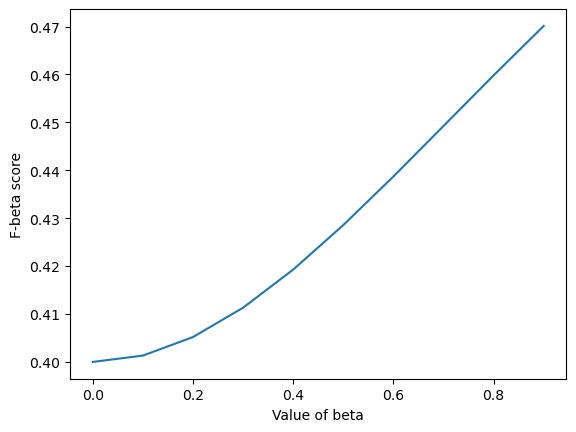

In [43]:
example_precision = 0.4
example_recall = 0.6
beta = [x*0.1 for x in range(0,10)]

plt.plot(beta, [f_beta_score(example_precision, example_recall, beta=b) for b in beta])
plt.xlabel('Value of beta')
plt.ylabel('F-beta score')